<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data(y_hat)_add_delta_(_3_6)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-3.6'

In [4]:
os.listdir(base_path)

['data_add_delta_-3.6_n20.csv',
 'data_add_delta_-3.6_n30.csv',
 'data_add_delta_-3.6_n60.csv',
 'data_add_delta_-3.6_n120.csv',
 'data_add_delta_-3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-3.6_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,73.847247,89.765946,42.732965,-0.000054,216.346104,216.345930,0.000174
1,0.0,1.0,52.627870,62.505517,55.381074,0.000772,180.515234,180.514573,0.000661
2,0.0,2.0,28.608718,88.042241,62.450294,0.000398,189.101651,189.101280,0.000371
3,0.0,3.0,25.563916,39.072423,92.035062,0.000194,166.671595,166.671923,-0.000327
4,0.0,4.0,98.619434,37.137133,24.685556,-0.000817,170.441305,170.442152,-0.000847
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,92.426239,63.313292,53.442889,0.000417,219.182836,219.182285,0.000552
249996,999.0,246.0,31.875682,42.646177,22.528008,0.000564,107.050431,107.049783,0.000648
249997,999.0,247.0,97.767977,69.642566,36.840364,0.000178,214.251086,214.250741,0.000345
249998,999.0,248.0,93.071502,41.048618,22.621754,-0.000039,166.741835,166.741630,0.000206


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,73.847247,89.765946,42.732965,-0.000054,216.346104,216.345930,0.000174
1,0.0,1.0,52.627870,62.505517,55.381074,0.000772,180.515234,180.514573,0.000661
2,0.0,2.0,28.608718,88.042241,62.450294,0.000398,189.101651,189.101280,0.000371
3,0.0,3.0,25.563916,39.072423,92.035062,0.000194,166.671595,166.671923,-0.000327
4,0.0,4.0,98.619434,37.137133,24.685556,-0.000817,170.441305,170.442152,-0.000847
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,92.426239,63.313292,53.442889,0.000417,219.182836,219.182285,0.000552
249996,999.0,246.0,31.875682,42.646177,22.528008,0.000564,107.050431,107.049783,0.000648
249997,999.0,247.0,97.767977,69.642566,36.840364,0.000178,214.251086,214.250741,0.000345
249998,999.0,248.0,93.071502,41.048618,22.621754,-0.000039,166.741835,166.741630,0.000206


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    73.847247  89.765946  42.732965 -0.000054  216.346104   
      1.0    52.627870  62.505517  55.381074  0.000772  180.515234   
      2.0    28.608718  88.042241  62.450294  0.000398  189.101651   
      3.0    25.563916  39.072423  92.035062  0.000194  166.671595   
      4.0    98.619434  37.137133  24.685556 -0.000817  170.441305   
...                ...        ...        ...       ...         ...   
999.0 245.0  92.426239  63.313292  53.442889  0.000417  219.182836   
      246.0  31.875682  42.646177  22.528008  0.000564  107.050431   
      247.0  97.767977  69.642566  36.840364  0.000178  214.251086   
      248.0  93.071502  41.048618  22.621754 -0.000039  166.741835   
      249.0  70.912558  45.641250  73.477691  0.000009  200.031507   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    216.345930  0.000174  
      1.0    180.514573  0.000661  
      2.0    189.101280  0.000371  
      3.0    166.671923 -0.000327  
      4.0    170.442152 -0.000847  
...                 ...       ...  
999.0 245.0  219.182285  0.000552  
      246.0  107.049783  0.000648  
      247.0  214.250741  0.000345  
      248.0  166.741630  0.000206  
      249.0  200.031419  0.000089  

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    73.847247  89.765946  42.732965 -0.000054  216.346104   
      1.0    52.627870  62.505517  55.381074  0.000772  180.515234   
      2.0    28.608718  88.042241  62.450294  0.000398  189.101651   
      3.0    25.563916  39.072423  92.035062  0.000194  166.671595   
      4.0    98.619434  37.137133  24.685556 -0.000817  170.441305   
...                ...        ...        ...       ...         ...   
999.0 245.0  92.426239  63.313292  53.442889  0.000417  219.182836   
      246.0  31.875682  42.646177  22.528008  0.000564  107.050431   
      247.0  97.767977  69.642566  36.840364  0.000178  214.251086   
      248.0  93.071502  41.048618  22.621754 -0.000039  166.741835   
      249.0  70.912558  45.641250  73.477691  0.000009  200.031507   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    216.345930  0.000174  
      1.0    180.514573  0.000661  
      2.0    189.101280  0.000371  
      3.0    166.671923 -0.000327  
      4.0    170.442152 -0.000847  
...                 ...       ...  
999.0 245.0  219.182285  0.000552  
      246.0  107.049783  0.000648  
      247.0  214.250741  0.000345  
      248.0  166.741630  0.000206  
      249.0  200.031419  0.000089  

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,73.847247,89.765946,42.732965,-0.000054,216.346104,216.345930,0.000174
1,0.0,1.0,52.627870,62.505517,55.381074,0.000772,180.515234,180.514573,0.000661
2,0.0,2.0,28.608718,88.042241,62.450294,0.000398,189.101651,189.101280,0.000371
3,0.0,3.0,25.563916,39.072423,92.035062,0.000194,166.671595,166.671923,-0.000327
4,0.0,4.0,98.619434,37.137133,24.685556,-0.000817,170.441305,170.442152,-0.000847
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,92.426239,63.313292,53.442889,0.000417,219.182836,219.182285,0.000552
249996,999.0,246.0,31.875682,42.646177,22.528008,0.000564,107.050431,107.049783,0.000648
249997,999.0,247.0,97.767977,69.642566,36.840364,0.000178,214.251086,214.250741,0.000345
249998,999.0,248.0,93.071502,41.048618,22.621754,-0.000039,166.741835,166.741630,0.000206


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    73.847247  89.765946  42.732965 -0.000054  216.346104   
      1.0    52.627870  62.505517  55.381074  0.000772  180.515234   
      2.0    28.608718  88.042241  62.450294  0.000398  189.101651   
      3.0    25.563916  39.072423  92.035062  0.000194  166.671595   
      4.0    98.619434  37.137133  24.685556 -0.000817  170.441305   
...                ...        ...        ...       ...         ...   
999.0 245.0  92.426239  63.313292  53.442889  0.000417  219.182836   
      246.0  31.875682  42.646177  22.528008  0.000564  107.050431   
      247.0  97.767977  69.642566  36.840364  0.000178  214.251086   
      248.0  93.071502  41.048618  22.621754 -0.000039  166.741835   
      249.0  70.912558  45.641250  73.477691  0.000009  200.031507   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    216.345930  0.000174  
      1.0    180.514573  0.000661  
      2.0    189.101280  0.000371  
      3.0    166.671923 -0.000327  
      4.0    170.442152 -0.000847  
...                 ...       ...  
999.0 245.0  219.182285  0.000552  
      246.0  107.049783  0.000648  
      247.0  214.250741  0.000345  
      248.0  166.741630  0.000206  
      249.0  200.031419  0.000089  

[250000 rows x 7 columns]

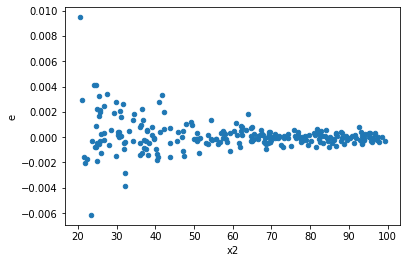

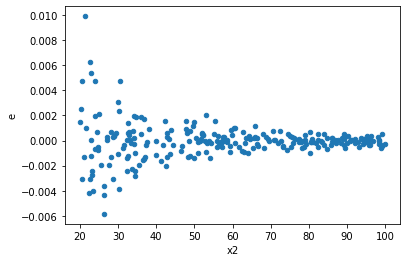

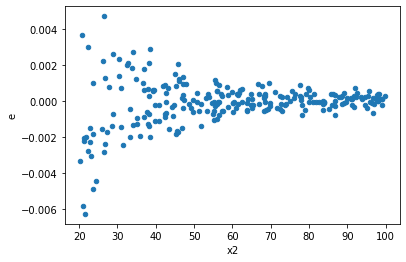

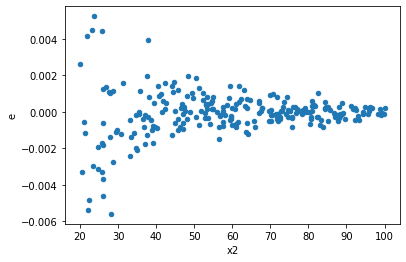

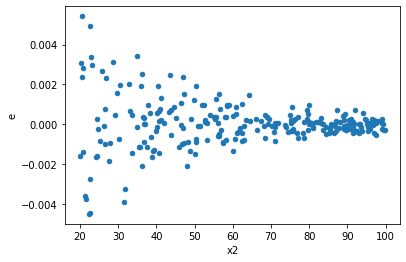

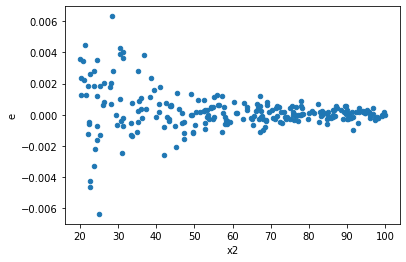

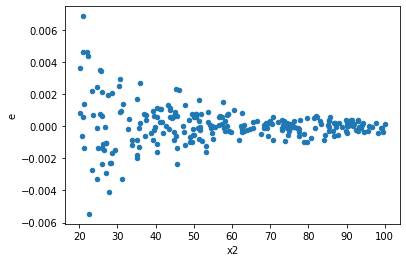

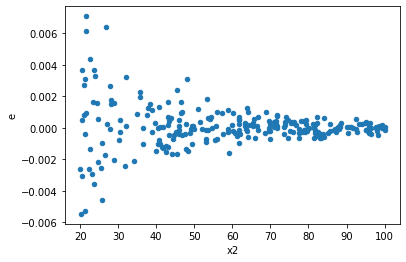

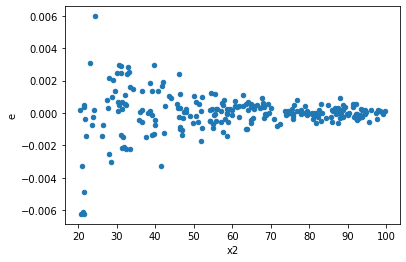

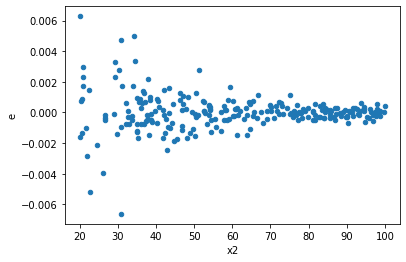

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
45.0,97.0,97.0,0.0001901384793341162,0.0002491727241457248,1.9601905085991362e-06,2.5687909705744827e-06,1.3104802616406337,0.1848073389732514,0.9075963305133743,0.0924036694866257,Reject005=1 : Homoscedasticity
624.0,97.0,97.0,0.0002145295634669308,0.00024532565144604605,2.211644984195163e-06,2.529130427278825e-06,1.1435517207112686,0.5101453067513204,0.7449273466243398,0.2550726533756602,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,0.0002653327226343822,3.769105002604737e-05,2.735388893137961e-06,3.885675260417255e-07,0.14205202302915393,3.3605794274561967e-19,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,0.00042171127363234553,4.884203187636115e-05,4.347538903426243e-06,5.035261018181562e-07,0.11581865349642607,1.522337779597279e-22,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,0.0002267901034303187,2.3311523189750855e-05,2.3380423034053473e-06,2.403249813376377e-07,0.10278897904781514,1.4202753641531344e-24,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,0.00026080257652467205,3.233225911353432e-05,2.6886863559244542e-06,3.333222589024157e-07,0.12397216141181669,2.0688304126085692e-21,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,0.0002550926018232725,2.896042047762277e-05,2.6298206373533246e-06,2.9856103585178114e-07,0.11352904894390657,7.02296742719032e-23,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,0.00027607307668988296,6.548704282588514e-05,2.8461141926792056e-06,6.751241528441767e-07,0.23720908830036955,1.0898937559595217e-11,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,0.00025876115360021565,4.709288665785383e-05,2.66764075876511e-06,4.854936768850911e-07,0.1819936493659788,2.145905690796329e-15,Reject005=0 : Heteroscedasticity
7.0,97.0,97.0,0.00038709528951262016,4.6943405512276225e-05,3.99067308775897e-06,4.839526341471775e-07,0.12127092936568985,8.928146569049327e-22,Reject005=0 : Heteroscedasticity
8.0,97.0,97.0,0.00024644115431887037,9.036178263282137e-05,2.5406304568955707e-06,9.315647694105296e-07,0.3666667723683123,1.3629222335773215e-06,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    989
Reject005=1 : Homoscedasticity       11
Name: Result_test, dtype: int64